# Census Exploration
## By Kiran Rao
### This is an exploration of the racial profile of Los Angeles County. Through this, we hope to find patterns in where communities may reside and provide additional context for an exploration of understanding where food insecurity is in Los Angeles.  I aim to use a multitude of different types of libraries and census data pertaining to Los Angeles county. I will look at different racial identites and create maps based on that data. 

### **Loading the Data + Libraries**

##### I will first load the relevant coding languages for our project.

In [63]:
import pandas as pd
import geopandas as gpd 

In [86]:
df = pd.read_csv('data/Race_LA County.csv')

##### I then have the dataset loaded into the document. This is data pulled directly from the U.S. Census pertaining to the racial/ethnic makeups of census tracts located in Los Angeles county. 

### **Intial Exploration & Clean-Up**

##### I am going to first understand how big my data set is.

In [87]:
df.shape

(2498, 50)

##### It is 50 columns and 2498 rows large, which accounts for each of the census tracts in the county.

In [88]:
df.head()

,Geo_FIPS,Geo_NAME,Geo_QNAME,Geo_NATION,Geo_STATE,Geo_COUNTY,Geo_CS,Geo_CT,Geo_PLACE,Geo_CSA,...,SE_T017_020,SE_T017_002,SE_T017_004,SE_T017_006,SE_T017_008,SE_T017_010,SE_T017_012,SE_T017_014,SE_T017_016,SE_T017_018
0,6037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",0,6,37,NaN,101110,NaN,NaN,...,4.121750,4.050484,6.927711,-12.162162,-50.000000,-10.699588,100.0,-53.333333,23.776224,4.305136
1,6037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",0,6,37,NaN,101122,NaN,NaN,...,1.746725,3.140175,7.263028,19.230769,75.000000,-20.808081,-100.0,130.000000,2.586207,-5.739130
2,6037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",0,6,37,NaN,101220,NaN,NaN,...,-0.564972,8.225729,5.354994,-5.555556,-63.636364,29.411765,-100.0,600.000000,-3.809524,-15.015723
3,6037101221,Census Tract 1012.21,"Census Tract 1012.21, Los Angeles County, Cali...",0,6,37,NaN,101221,NaN,NaN,...,0.291206,0.132567,5.444126,-17.977528,-25.000000,-5.747126,0.0,100.000000,-41.666667,0.597780
4,6037101222,Census Tract 1012.22,"Census Tract 1012.22, Los Angeles County, Cali...",0,6,37,NaN,101222,NaN,NaN,...,9.859155,17.241379,27.074236,-19.148936,50.000000,-20.855615,NaN,NaN,-2.500000,-0.763359


##### Here, I pulled the headers of the data to gain more information about the data types prevalent in my data set. I see there are geo_FIPS, names of the census tracts, and columns accounting for the individual race breakdowns of the county.

In [89]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 50 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Geo_FIPS     2498 non-null   int64  
 1   Geo_NAME     2498 non-null   object 
 2   Geo_QNAME    2498 non-null   object 
 3   Geo_NATION   2498 non-null   int64  
 4   Geo_STATE    2498 non-null   int64  
 5   Geo_COUNTY   2498 non-null   int64  
 6   Geo_CS       0 non-null      float64
 7   Geo_CT       2498 non-null   int64  
 8   Geo_PLACE    0 non-null      float64
 9   Geo_CSA      0 non-null      float64
 10  SE_T004_019  2498 non-null   int64  
 11  SE_T004_001  2498 non-null   int64  
 12  SE_T004_003  2498 non-null   int64  
 13  SE_T004_005  2498 non-null   int64  
 14  SE_T004_007  2498 non-null   int64  
 15  SE_T004_009  2498 non-null   int64  
 16  SE_T004_011  2498 non-null   int64  
 17  SE_T004_013  2498 non-null   int64  
 18  SE_T004_015  2498 non-null   int64  
 19  SE_T00

##### Above, I am running the info function to recieve information about the types of data in my set so I can figure out which data to utilize as well as make sure my data works. It looks like it recognizes most of the data aside from my geo_id has been read in probably. I am going to look at the geo_id column to understand what may be impacting it.   

In [90]:
df.Geo_FIPS.head()

0    6037101110
1    6037101122
2    6037101220
3    6037101221
4    6037101222
Name: Geo_FIPS, dtype: int64

##### However, in the pull, our leading zeros disappeared, so we should run a another piece of code that essentially changes the data type of the geo_FIPS column to a string value, as opposed to an integer, in which the csv file will erase the leading zero. 

In [91]:
df = pd.read_csv(
    'Race_LA County.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

FileNotFoundError: [Errno 2] No such file or directory: 'Race_LA County.csv'

##### This will have fixed our data, which we can confirm by looking at the data again. 

In [ ]:
df.head()

##### As discussed,our data has the leading zero, which is critical for the census tract data. We can also look at the data types to show further information about the data.

In [ ]:
df.info(verbose=True, show_counts=True)

###### Next, I am going to delete the columns that may have fully null columns, as it will not help in my calculation. This will happen using the isna function, alongside the all function. 

In [ ]:
df.columns[df.isna().all()].tolist()

##### From here, we see that there are three columns that are completely empty, so we can use the dropna function to drop these values. 

In [ ]:
df = df.dropna(axis=1,how="all")

In [ ]:
df.info()

##### Now, those three columns have been dropped. We can run the isna function again to see if there are any columns left that are compeletely empty. 

In [ ]:
df.columns[df.isna().all()].tolist()

##### No columns with no values. Next, we can designate the columns that we want to keep in the portal by keeping the "Race by Ethnicity" columns, and create a new data frame from it. 

In [92]:
columns_to_keep = ['Geo_FIPS',
                   'SE_T004_019',
                   'SE_T004_001',
                   'SE_T004_003',
                   'SE_T004_005',
                   'SE_T004_007',
                   'SE_T004_009',
                   'SE_T004_011',
                   'SE_T004_013',
                   'SE_T004_015',
                   'SE_T004_017']
df2 = df[columns_to_keep]

##### We can move into renaming the columns to read the codes as the race/ethnicity they represent. Using the columns function and the list function, we can rename the respective names according to the data dictionary.

In [93]:
columns = list(df2)
columns

['Geo_FIPS',
 'SE_T004_019',
 'SE_T004_001',
 'SE_T004_003',
 'SE_T004_005',
 'SE_T004_007',
 'SE_T004_009',
 'SE_T004_011',
 'SE_T004_013',
 'SE_T004_015',
 'SE_T004_017']

In [94]:
df2.columns = ['FIPS',
'TotalPop',
'Non Hispanic',
'Non Hispanic White Alone',
'Non Hispanic Black Alone',
'Non Hispanic American Indian and Alaska Native Alone',
'Non Hispanic Asian Alone',
'Non Hispanic Native Hawaiian and Pacific Islander Alone',
'Non Hispanic Other Alone',
'Non Hispanic Multi Race',
'Hispanic']

We can then run the sample code to test if the column renaming worked, and it looks like it did!

In [95]:
df2.sample(5)

,FIPS,TotalPop,Non Hispanic,Non Hispanic White Alone,Non Hispanic Black Alone,Non Hispanic American Indian and Alaska Native Alone,Non Hispanic Asian Alone,Non Hispanic Native Hawaiian and Pacific Islander Alone,Non Hispanic Other Alone,Non Hispanic Multi Race,Hispanic
196,6037123410,3967,1796,1397,105,4,221,4,21,44,2171
650,6037211500,4230,3253,1585,143,5,1351,1,14,154,977
1426,6037432602,4504,2268,166,18,6,2011,3,23,41,2236
1504,6037464200,5747,5414,1236,11,0,3937,4,17,209,333
337,6037137302,4341,3918,3092,104,4,463,4,33,218,423


##### I'm going to now run some codes to pull statistics for communities of color.

In [96]:
df2['Non Hispanic Black Alone'].head()

0    65
1    31
2    34
3    73
4    76
Name: Non Hispanic Black Alone, dtype: int64

In [97]:
df2['Non Hispanic Asian Alone']

0       434
1       392
2       352
3       246
4       148
       ... 
2493      0
2494      0
2495      0
2496      0
2497      0
Name: Non Hispanic Asian Alone, Length: 2498, dtype: int64

In [98]:
df2['Non Hispanic Native Hawaiian and Pacific Islander Alone']

0       8
1       0
2       0
3       3
4       0
       ..
2493    0
2494    0
2495    0
2496    0
2497    0
Name: Non Hispanic Native Hawaiian and Pacific Islander Alone, Length: 2498, dtype: int64

##### We can also pull some general overall statistics for the data.

In [99]:
df2['TotalPop'].mean()

4008.810648518815

In [100]:
df2['TotalPop'].median()

3905.0

In [101]:
df2['TotalPop'].describe()

count     2498.000000
mean      4008.810649
std       1426.474450
min          0.000000
25%       3036.250000
50%       3905.000000
75%       4882.000000
max      13527.000000
Name: TotalPop, dtype: float64

##### The above give overall statistical data. Let's chart some data about the non Hispanic Black population, using a histogram.

<Axes: ylabel='Frequency'>

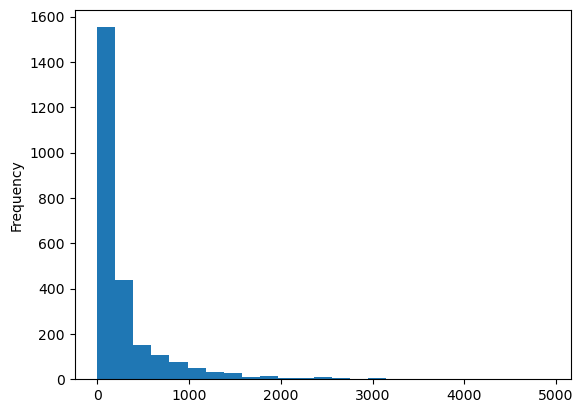

In [102]:
df2['Non Hispanic Black Alone'].plot.hist(bins=25)

##### The amount of bars near the 0 show us that there is a high amount of communities that have very few Black folks in them. Let's run a boxplot on this data.

<Axes: >

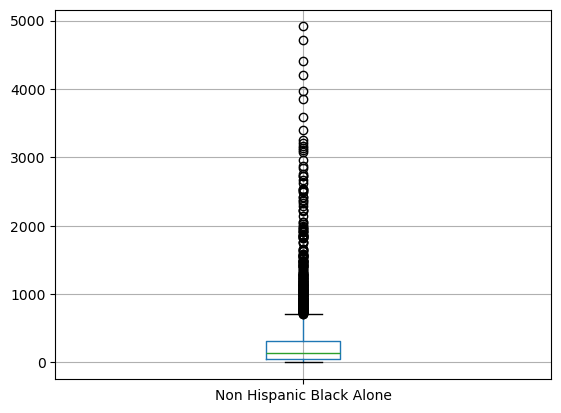

In [103]:
df2.boxplot(column=['Non Hispanic Black Alone'])

##### Lets compare the total population to the Black population.

<Axes: xlabel='Non Hispanic Black Alone', ylabel='TotalPop'>

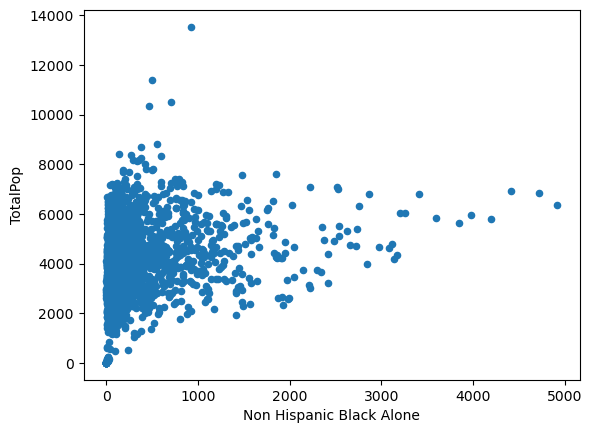

In [104]:
df2.plot.scatter(x='Non Hispanic Black Alone',y='TotalPop')

##### This data shows the concentration of communities with little to no Black folks. Let's also pull the most population census tracts using the sort function.

In [105]:
df_sorted = df2.sort_values(by='TotalPop',ascending = False)
df_sorted[['FIPS','TotalPop']].head(10)

,FIPS,TotalPop
938,6037265301,13527
2278,6037702900,11373
1028,6037275604,10520
2438,6037920121,10332
2417,6037920043,8832
69,6037108202,8701
1604,6037502303,8396
1309,6037406103,8353
1207,6037401707,8320
2176,6037621201,8259


##### The most populated census tract is the one that covers UCLA! Let's keep going. I want to know the census tracts that have at least 2,500 Black folks in them

In [106]:
df_subset = df2[df2['Non Hispanic Black Alone'] > 2500]

In [107]:
df_subset

,FIPS,TotalPop,Non Hispanic,Non Hispanic White Alone,Non Hispanic Black Alone,Non Hispanic American Indian and Alaska Native Alone,Non Hispanic Asian Alone,Non Hispanic Native Hawaiian and Pacific Islander Alone,Non Hispanic Other Alone,Non Hispanic Multi Race,Hispanic
832,6037234600,5106,3275,284,2532,11,81,8,61,298,1831
837,6037235100,4690,3689,489,2721,5,135,6,40,293,1001
839,6037235202,4765,3041,92,2662,12,55,4,38,178,1724
847,6037236400,4346,3953,404,3164,3,119,3,45,215,393
852,6037237300,5531,2912,101,2535,5,42,6,37,186,2619
861,6037238000,5969,4403,105,3972,18,43,20,53,192,1566
862,6037238100,4683,3378,109,2968,17,38,8,60,178,1305
863,6037238200,5848,4020,103,3590,17,42,19,51,198,1828
866,6037238400,4632,3447,96,3079,7,37,3,33,192,1185
1778,6037540800,6321,3051,70,2758,12,56,10,28,117,3270


### Mapping the Data

##### We are going to import a geojson file from the LA Times with all of the census tract data we need.

In [108]:
tracts=gpd.read_file('data/Census_Tracts_2020.geojson')

In [109]:
tracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


<Axes: >

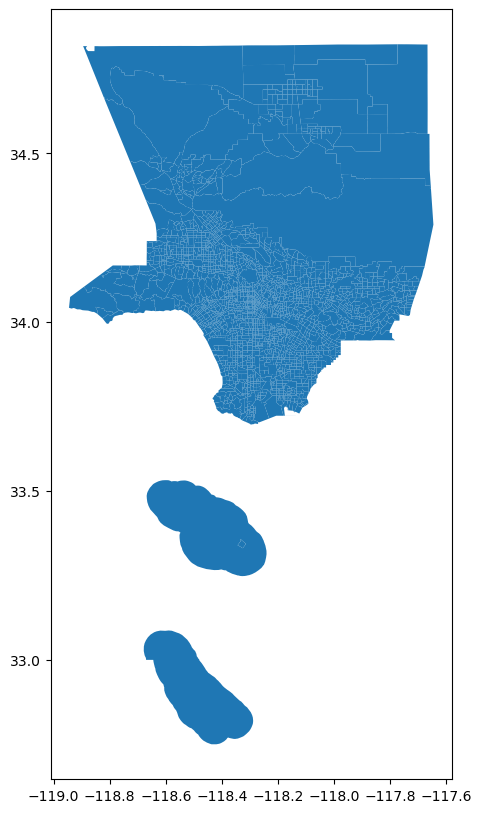

In [110]:
tracts.plot(figsize=(12,10))

##### This is the census data from the LA Times, mapped, giving us the context of information we need to code. We are then to isolate the certain number of columns we need from the data, which are FIPS and geometry. We'll also check our work at the end, as well as add back in our leading zero.

In [111]:
tracts = tracts[['CT20','geometry']]
tracts.head()

,CT20,geometry
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [112]:
tracts['FIPS'] ='06' + '037' + tracts['CT20']

/opt/conda/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [113]:
tracts.head()

,CT20,geometry,FIPS
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222


##### From here, we will essentially merge the geometry of the census tracts with the geo_id codes in the data, so we can then proceed to map our data.

In [114]:
tracts_race=tracts.merge(df2,on="FIPS")

ValueError: You are trying to merge on object and int64 columns for key 'FIPS'. If you wish to proceed you should use pd.concat

In [ ]:
tracts_race.head()

##### Let's map the Black population in Los Angeles using a heatmap. Let's also import the list of colors we can choose and use.

In [ ]:
from matplotlib import colormaps
list(colormaps)

In [ ]:
tracts_race.plot(figsize=(10,14),
                 column='Non Hispanic Black Alone',
                 legend=True, 
                 scheme='NaturalBreaks',
                cmap= 'winter')

##### We see a large community of Black folks are in the South central part of Los Angeles county, as well as the Northern part.

##### Let's map the Latinx/Hispanic population in LA.

In [ ]:
tracts_race.plot(figsize=(14,10),
                 column='Hispanic',
                 legend=True, 
                 scheme='NaturalBreaks',
                cmap= 'Pastel1')

##### Latinx populations are more spread throughout Los Angeles, but there is definitely concentrations in the South central/Eastern part of LA County. Let's map the Native American/Alaska Native population.

In [ ]:
tracts_race.plot(figsize=(10,14),
                 column='Non Hispanic American Indian and Alaska Native Alone',
                 legend=True, 
                 scheme='NaturalBreaks',
                cmap= 'summer')


##### These populations are also found more sparsely throughout Los Angeles county, with a big population in Western LA County. Let's also map the Asian population in Los Angeles.

In [ ]:
tracts_race.plot(figsize=(10,14),
                 column='Non Hispanic Asian Alone',
                 legend=True, 
                 scheme='NaturalBreaks',
                cmap= 'afmhot')


##### Asians populations are not as spread out through LA but we see a band through the middle of LA county with the Asian population, concentrations again towards the East side of the map. Lastly, lets map the white populations.

In [ ]:
tracts_race.plot(figsize=(10,14),
                 column='Non Hispanic White Alone',
                 legend=True, 
                 scheme='NaturalBreaks',
                cmap= 'spring')

##### White folks are also not spreadthroughout LA county -- rather high populations are found in the Western coastal sections of the county.
##### With that map, we have established the spread of some of the larger racial ethnic populations in LA county, which concludes my data exploration. 